# Importing necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Correct URL for exporting the Google Sheets file

In [2]:
url = 'https://docs.google.com/spreadsheets/d/1HbTO-7yTR-7BIUVv2BiiPcGwViPoxp4Y/export?format=xlsx'

# Reading the Excel file, setting header=None

In [3]:
df = pd.read_excel(url, header=None, names=['Careers'])

# List of valid career options

In [4]:
correct_words = [
    "Doctor", "Lawyer", "Teacher", "Engineer", "Accountant", 
    "Nurse", "Police", "Architect", "Dentist", "Pharmacist"
]


# Function to calculate the Levenshtein distance

In [5]:
def lavenshtein(word1,word2):
    l1=len(word1)
    l2=len(word2)
    dp=np.zeros((l1+1,l2+1))
    for i in range (l1+1):
        dp[i][0]=i
    for i in range (l2+1):
        dp[0][i]=i
    for row in range (l1+1):
        for col in range (l2+1):
            if(word1[row-1]==word2[col-1]):
                dp[row][col]=dp[row-1][col-1]
            else:
                mini=min(dp[row-1][col],dp[row][col-1],dp[row-1][col-1])
                dp[row][col]=mini+1
    return dp[l1][l2]

# Correcting all spellings

In [6]:
for index, row in df.iterrows():
    min_dist = 100  # Setting to hundred initially
    minj = None  # Initialize minj to None
    for j in correct_words:
        dist = lavenshtein(str(row["Careers"]).lower(), j.lower())
        if dist < min_dist:
            min_dist = dist
            minj = j
    df.at[index, "Careers"] = minj  # Updating the DataFrame with the closest match

## Corrected responses

In [ ]:
df.head(10)

# Counting the frequency of each career choice

In [7]:
career_counts = df['Careers'].value_counts()

# Plotting the results

## Defining colors for each bar

In [8]:
colors = ['red', 'blue', 'green', 'yellow', 'purple' , 'orange' , 'cyan' , 'magenta' , 'pink' , 'brown']

## Convert career_counts.values() to a list

In [9]:
values_list = list(career_counts.values)

## Plotting the career aspirations of students using Matplotlib with colorful bars

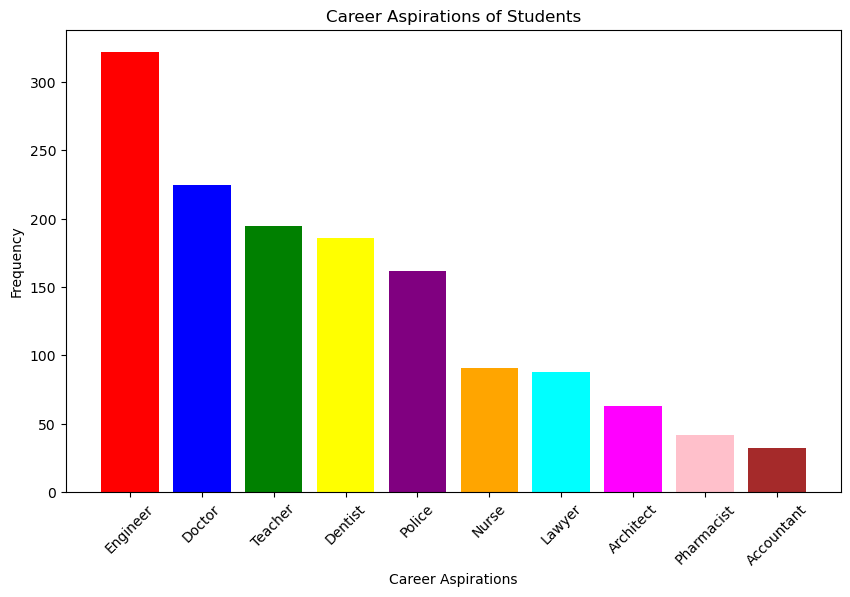

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(career_counts.keys(), values_list, color=colors)
plt.xlabel('Career Aspirations')
plt.ylabel('Frequency')
plt.title('Career Aspirations of Students')
plt.xticks(rotation=45) # Rotating x-axis labels for better readability
plt.show()